In [ ]:
# Goal: draw random walk

In [7]:
# random numbers
randint(0,1) # generates "random" integer between 0 and 1, uniformly

0

In [18]:
# CHALLENGE: using just randint(0,1), (and basic arithmetic)
# create random variable that is -1,1, each with 
# probability 1/2
2*randint(0,1) - 1

1

In [19]:
def basic_rand_walk(num_steps):
    """Produce random walk with num_steps steps.
    Go up or down at each step, with probability 1/2 each."""
    vert_list = [0] # list of vertical positions; vert_list[i] will be pos at time i
    for n in range(num_steps):
        # choose step size randomly
        rand = 2*randint(0,1) - 1 # generates -1,1, each with prob 1/2
        new_vert = vert_list[-1] + rand 
        vert_list.append(new_vert)
    return vert_list

In [34]:
b = basic_rand_walk(10);
print(b)

[0, -1, -2, -3, -4, -5, -6, -5, -4, -3, -2]


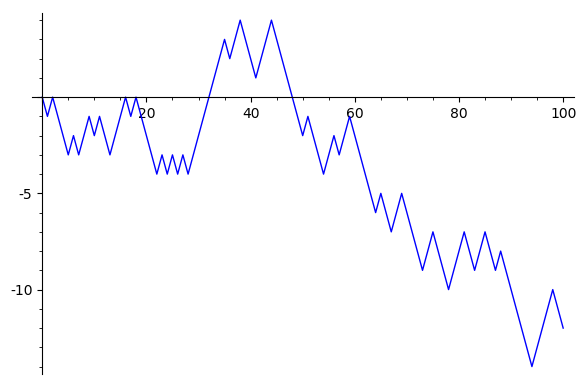

In [33]:
list_plot(b, plotjoined=true)

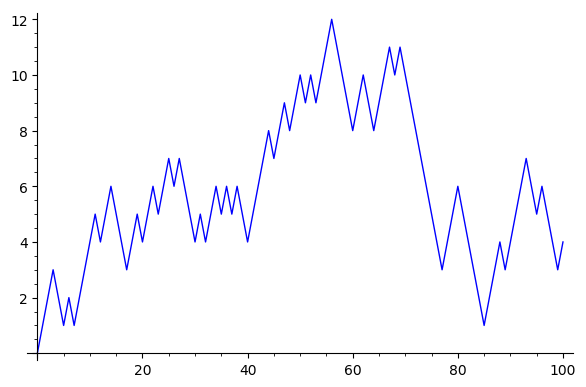

In [35]:
list_plot(basic_rand_walk(100), plotjoined=true)

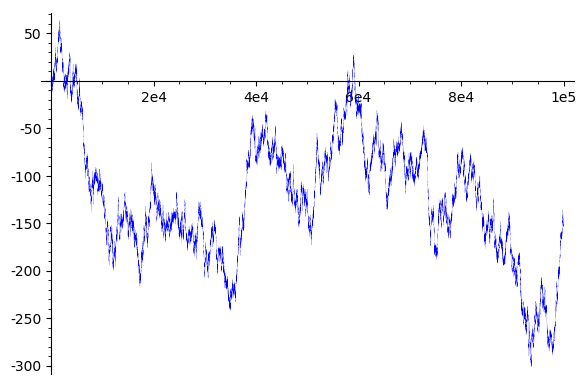

In [52]:
p5=list_plot(basic_rand_walk(100000), plotjoined=true, thickness=0.1);
show(p5)

In [42]:
p5.save("basic_rand_walk5.pdf")

In [44]:
p2=list_plot(basic_rand_walk(100), plotjoined=true, color='red')

In [45]:
p3=list_plot(basic_rand_walk(1000), plotjoined=true, color='green')

In [51]:
p4=list_plot(basic_rand_walk(10000), plotjoined=true, color='orange')

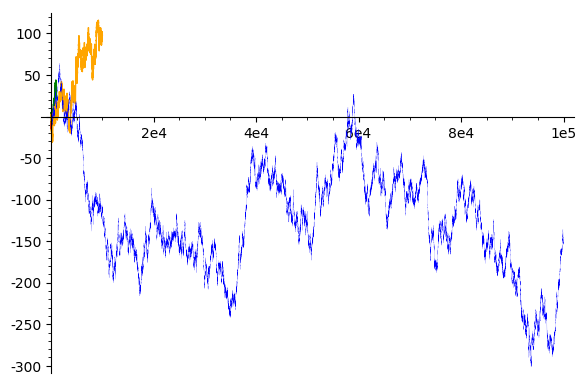

In [53]:
show(p2+p3+p4+p5)

In [ ]:
# Goal: figure out appropriate rescaling so that basic_rand_walk(n) lives 
# in a box of approximately fixed size (so then can take limit)


In [54]:
def rand_walk(num_steps, hor_step, vert_step):
    """Produce random walk with num_steps steps.
    Horizontal step size = hor_step.
    Vertical step size = vert_step.
    Go up or down at each step, with probability 1/2 each."""
    pos_list = [(0,0)] # list of (x,y) coords for pos
    for n in range(num_steps):
        # choose step size randomly
        rand = 2*randint(0,1) - 1 # generates -1,1, each with prob 1/2
        new_hor = pos_list[-1][0] + hor_step
        new_vert = pos_list[-1][1] + rand*vert_step 
        pos_list.append((new_hor,new_vert))
    return pos_list

In [59]:
r = rand_walk(10,3,5)
print(r)

[(0, 0), (3, 5), (6, 10), (9, 5), (12, 0), (15, 5), (18, 0), (21, 5), (24, 0), (27, -5), (30, -10)]


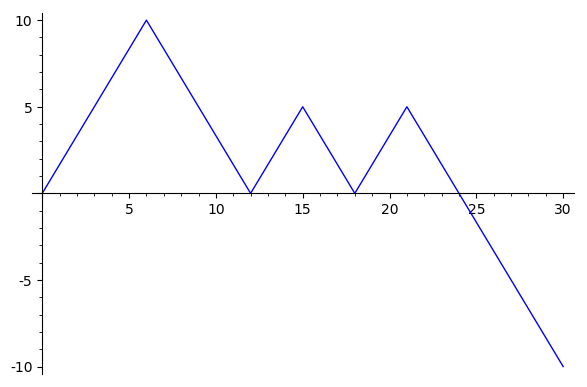

In [61]:
list_plot(r, plotjoined=true)

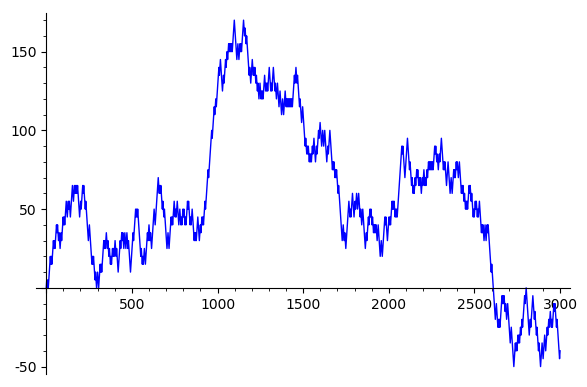

In [62]:
list_plot(rand_walk(1000,3,5), plotjoined=true)

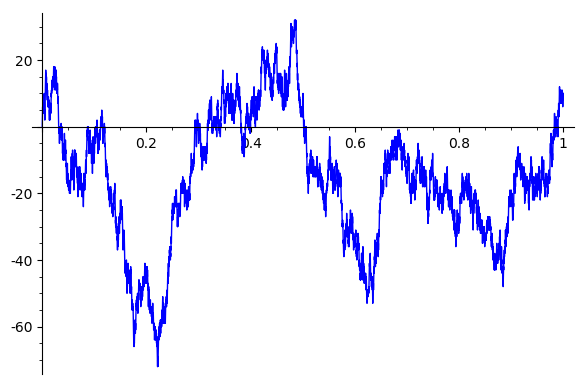

In [77]:
# How should we scale hor_step so that random walk always goes 1 total in hor direction?
n = 10000
list_plot(rand_walk(n, 1/n, 1), plotjoined=true)

In [78]:
# How should we scale vertical direction?
# Do experiment to figure out how far we move in vertical direction 
# Number of steps: 100 -> 4, 10, 20
# 1000 -> 75, 50, 25
# 10000 -> 50, 150, 70
# vertical motion approx sqrt(num_steps)

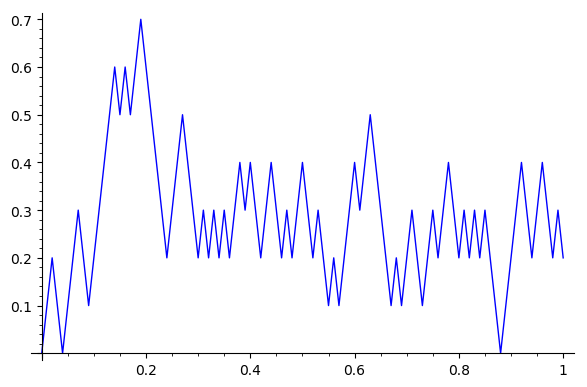

In [81]:
n = 100
p2=list_plot(rand_walk(n, 1/n, 1/sqrt(n)), plotjoined=true)
show(p2)

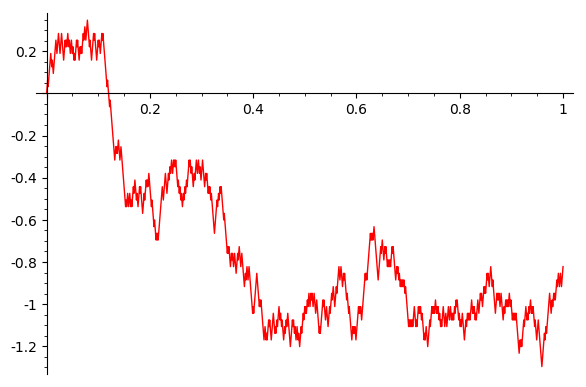

In [86]:
n = 1000
p3=list_plot(rand_walk(n, 1/n, 1/sqrt(n)), plotjoined=true, color='red')
show(p3)

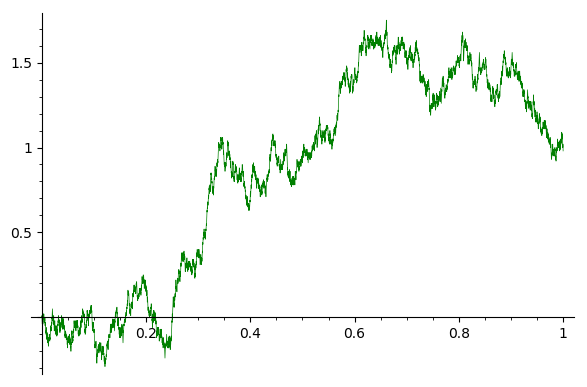

In [92]:
n = 10000
p4=list_plot(rand_walk(n, 1/n, 1/sqrt(n)), plotjoined=true, thickness=0.5, color='green')
show(p4)

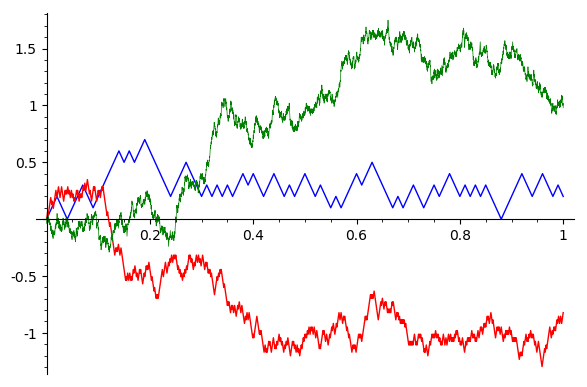

In [93]:
show(p2+p3+p4)
# Correctly scaled, we can now compare random walks with different numbers of steps